## Load necessary Julia Packages

In [1]:
using LinearAlgebra, Statistics
using DataFrames, Parameters, Plots, Random, Distributions, Formatting
gr(fmt = :png);
ENV["GKS_ENCODING"]="utf-8"

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1278
┌ Info: Precompiling Parameters [d96e819e-fc66-5662-9728-84c9c7592b0a]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1278


"utf-8"

## The Model

In [2]:
# Paraneters are:

T = 10^4 # Time. You Can change it to 10^8 in order SW to converge in the limit, but it'll take your CPU more time to compute.
ρ = 0.99 # Discount factor
γ_x = 1 # Pricision of private information
γ_y = 2  # Precision of public information
θ_old = 1.0 # initial value of fundamental
μ_x = θ_old + 5 # bias of private information
μ_y = θ_old + (-3) # bias of public information
μ_old = 1.0 # Expectaion of fundamental conditional on private and public information and beliefs at t = 0. E_t-1(θ_t| x_t-1, y_t-1, θ_0)
γ_θ = 2.0 # Precision of initial beliefs
a_i_old = 1.0 # Initial action a_0 equals θ_0 ????
ω = randn(T)
N = 100000
ε = rand(Normal(μ_x, 1/γ_x), T)
ξ = rand(Normal(μ_y, 1/γ_y), T)
r = 0.3 #strength of strategic complementarity
SW_old = 0.0 # social welfare loss at t = 0

# Simulate the model ny creating a data frame and "push!"-ing it with the new values!

df = DataFrame(θ = θ_old, x_t = μ_x, y_t = μ_y, μ = μ_old, β_1 = γ_θ, a_i = a_i_old, SW = SW_old)

for t in 2:T
        # unpack old variables
    θ_old, μ_x, y_old, μ_old, γ_θ, a_i_old, SW_old = (df.θ[end], df.x_t[end], df.y_t[end], df.μ[end], df.β_1[end], df.a_i[end], df.SW[end])

        # define new beliefs
        θ = ρ * θ_old + (1/sqrt(γ_θ)) * ω[t-1]
        x_t = θ_old + ε[t-1]
        y_t = θ_old + ξ[t-1]
        μ = ρ * (γ_x*N *μ_x + γ_y * μ_y + μ_old*γ_θ) / (γ_θ + N * γ_x + N * γ_y)
        β_1 = 1.0/(ρ^2/(γ_θ + N * γ_x + N * γ_y) + 1/γ_θ)
        a_i = ρ * (γ_y *N* μ_y + (1-r)*(γ_x*N*μ_x + γ_θ*μ_old)) / (γ_x * N * (1-r)+ γ_y*N + γ_θ)
        SW = -(a_i - θ)^2
        # compute new aggregates
    
        push!(df, (θ, x_t, y_t, μ, β_1, a_i, SW))
    θ = θ_old
    x_t = μ_x
    y_t = y_old
    μ = μ_old
    β_1 = γ_θ
    a_i = a_i_old
end

Welfare = (sum(df.SW))/T

printfmt("Social Welfare = {:f}", Welfare)

Social Welfare = -11.968527

## Useful note:

* Try changing r from 0 to 1 whth 0.1 interval and see, how agents' actions changing!
* Play with the parameters and see the plots in order to get more intuition!

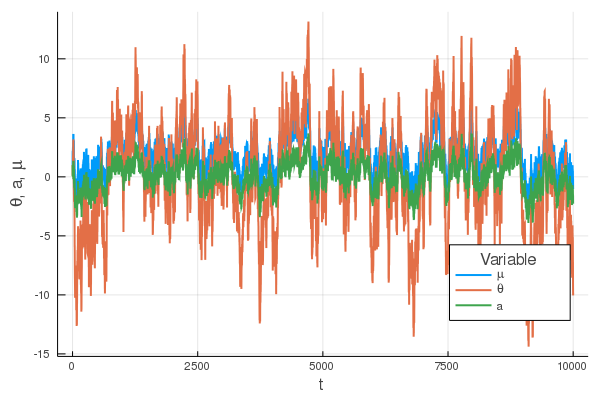

In [3]:
ps = plot(eachindex(df.μ), df.μ, lw = 2, label = "\\mu")
plot!(eachindex(df.θ), df.θ, lw = 2, label = "\\theta")
plot!(eachindex(df.a_i), df.a_i, lw = 2, label = "a")
plot!(xlabel = "t", ylabel = "\\theta, a, \\mu", legend_title = "Variable", legend = :bottomright)

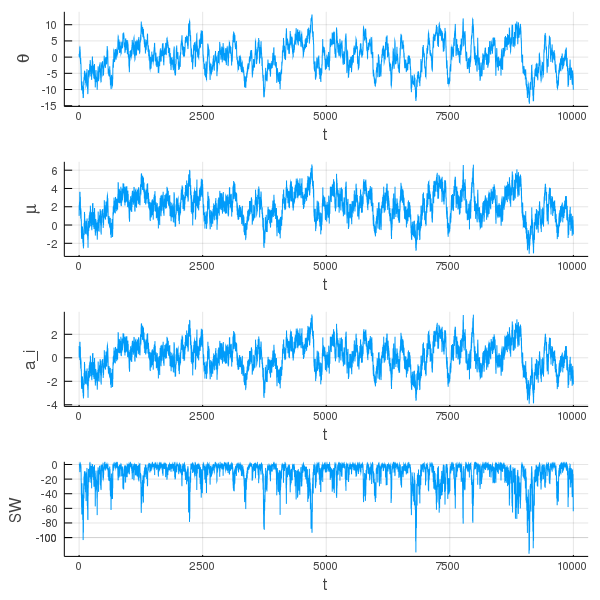

In [4]:
len = eachindex(df.θ)
yvals = [df.θ, df.μ, df.a_i, df.SW]
vars = ["\\theta", "\\mu", "a_i", "SW"]

plt = plot(layout = (4,1), size = (600, 600))

for i in 1:4
    plot!(plt[i], len, yvals[i], xlabel = "t", ylabel = vars[i], label = "")
end

pf = plot(plt)

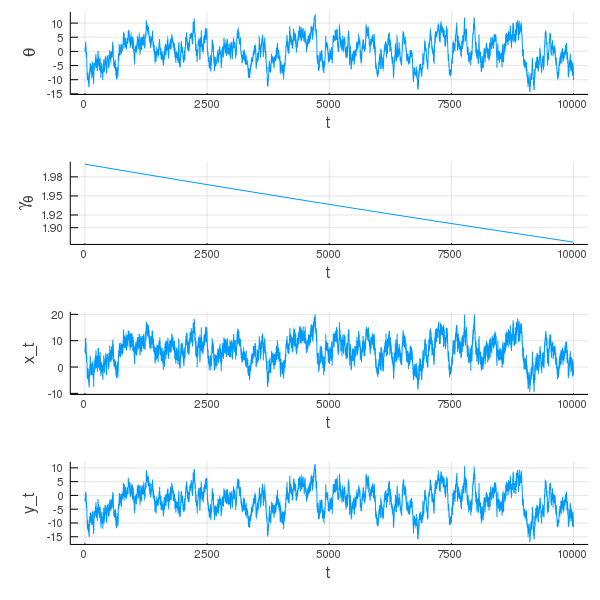

In [5]:
len = eachindex(df.θ)
yvals = [df.θ, df.β_1, df.x_t, df.y_t]
vars = ["\\theta", "\\gamma_\\theta", "x_t", "y_t"]

plt = plot(layout = (4,1), size = (600, 600))

for i in 1:4
    plot!(plt[i], len, yvals[i], xlabel = "t", ylabel = vars[i], label = "")
end

pff = plot(plt)